In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np


In [150]:
# Load data from CSV
data = pd.read_csv('ready_to_use_model.csv')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         794 non-null    int64  
 1   Name               794 non-null    object 
 2   Location           794 non-null    object 
 3   Year               794 non-null    int64  
 4   Kilometers_Driven  794 non-null    int64  
 5   Fuel_Type          794 non-null    int64  
 6   Transmission       794 non-null    int64  
 7   Owner_Type         794 non-null    int64  
 8   Mileage            794 non-null    float64
 9   Engine             794 non-null    float64
 10  Power              794 non-null    float64
 11  Seats              794 non-null    int64  
 12  New_Price          794 non-null    int64  
 13  Price              794 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 87.0+ KB


In [152]:
data.drop(data.columns[data.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,1,1,1,13.00,1199.0,88.70,5,861000,450000
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,2,2,1,11.36,2755.0,171.50,8,2100000,1750000
2,Maruti Ciaz Zeta,Kochi,2018,25692,1,1,1,21.56,1462.0,103.25,5,1065000,994999
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,2,1,1,13.50,2477.0,175.56,7,3201000,1500000
4,BMW 3 Series 320d,Kochi,2014,32982,2,2,1,22.69,1995.0,190.00,5,4787000,1855000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Tata Bolt Revotron XT,Chennai,2016,10000,1,1,1,17.57,1193.0,88.70,5,777000,400000
790,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,1,1,1,16.09,1598.0,103.50,5,1191000,325000
791,Maruti Vitara Brezza VDi,Pune,2016,37208,2,1,1,24.30,1248.0,88.50,5,993000,743000
792,Honda Brio 1.2 VX MT,Delhi,2013,33746,1,1,1,18.50,1198.0,86.80,5,663000,320000


In [153]:
data.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02,7.940000e+02
mean,2015.933249,40025.120907,1.541562,1.367758,1.068010,19.562431,1592.877834,117.124584,5.308564,2.089670e+06,1.284010e+06
std,2.255849,28360.141568,0.498584,0.482499,0.256879,4.411906,532.419215,49.346709,0.782373,2.030210e+06,1.256167e+06
min,2007.000000,600.000000,1.000000,1.000000,1.000000,0.000000,799.000000,53.000000,2.000000,3.910000e+05,1.750000e+05
25%,2015.000000,20336.500000,1.000000,1.000000,1.000000,16.962500,1197.000000,81.860000,5.000000,8.034992e+05,5.099990e+05
50%,2017.000000,34649.500000,2.000000,1.000000,1.000000,19.500000,1497.000000,98.960000,5.000000,1.166000e+06,8.145000e+05
75%,2017.000000,53312.750000,2.000000,2.000000,1.000000,22.690000,1968.750000,152.160000,5.000000,2.477250e+06,1.698750e+06
max,2019.000000,215000.000000,2.000000,2.000000,3.000000,28.400000,4951.000000,395.000000,8.000000,9.992000e+06,7.880000e+06


In [154]:
data["Mileage"]=data["Mileage"].astype(np.int64)
data["Engine"]=data["Engine"].astype(np.int64)
data["Power"]=data["Power"].astype(np.int64)

In [155]:
X = data.drop(["Name",'Location',"Price","Seats","Transmission","Mileage"],axis=1)
print(X)
Y = data['Price']

     Year  Kilometers_Driven  Fuel_Type  Owner_Type  Engine  Power  New_Price
0    2011              46000          1           1    1199     88     861000
1    2016              36000          2           1    2755    171    2100000
2    2018              25692          1           1    1462    103    1065000
3    2014             110000          2           1    2477    175    3201000
4    2014              32982          2           1    1995    190    4787000
..    ...                ...        ...         ...     ...    ...        ...
789  2016              10000          1           1    1193     88     777000
790  2011              38000          1           1    1598    103    1191000
791  2016              37208          2           1    1248     88     993000
792  2013              33746          1           1    1198     86     663000
793  2014              27365          2           1    1248     74     788000

[794 rows x 7 columns]


<Axes: >

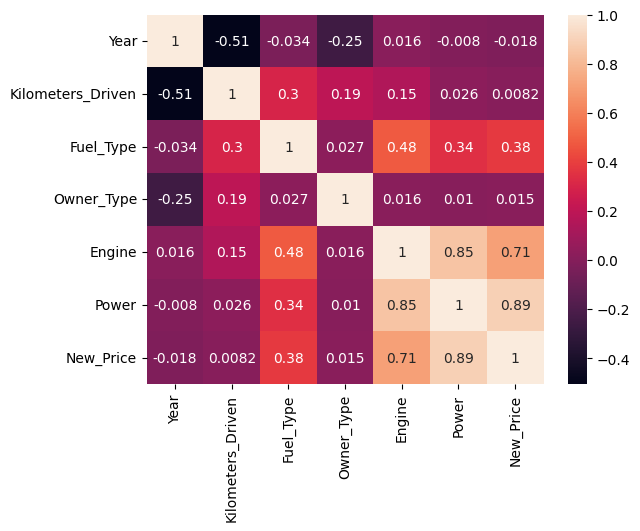

In [156]:
sns.heatmap(X.corr(),annot=True)

In [157]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,1,1,1,13,1199,88,5,861000,450000
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,2,2,1,11,2755,171,8,2100000,1750000
2,Maruti Ciaz Zeta,Kochi,2018,25692,1,1,1,21,1462,103,5,1065000,994999
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,2,1,1,13,2477,175,7,3201000,1500000
4,BMW 3 Series 320d,Kochi,2014,32982,2,2,1,22,1995,190,5,4787000,1855000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Tata Bolt Revotron XT,Chennai,2016,10000,1,1,1,17,1193,88,5,777000,400000
790,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,1,1,1,16,1598,103,5,1191000,325000
791,Maruti Vitara Brezza VDi,Pune,2016,37208,2,1,1,24,1248,88,5,993000,743000
792,Honda Brio 1.2 VX MT,Delhi,2013,33746,1,1,1,18,1198,86,5,663000,320000


In [159]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

In [160]:
X_train

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Engine,Power,New_Price
314,2018,10000,2,1,2143,136,4194000
74,2019,13190,1,1,1950,181,4949000
437,2017,15050,2,1,1956,170,2319000
448,2015,55000,1,1,998,67,600000
66,2016,82756,2,1,2523,62,1128000
...,...,...,...,...,...,...,...
715,2015,26000,1,1,1197,81,643000
767,2014,70000,2,1,1461,108,1501000
72,2012,30000,1,1,998,67,474000
235,2017,40000,2,1,1248,74,743000


In [161]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 314 to 37
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               635 non-null    int64
 1   Kilometers_Driven  635 non-null    int64
 2   Fuel_Type          635 non-null    int64
 3   Owner_Type         635 non-null    int64
 4   Engine             635 non-null    int64
 5   Power              635 non-null    int64
 6   New_Price          635 non-null    int64
dtypes: int64(7)
memory usage: 39.7 KB


In [162]:
y_train=y_train.astype(np.int64)
y_train

314    2890000
74     3899000
437    1750000
448     350000
66      770000
        ...   
715     365000
767     825000
72      330000
235     525000
37     3567000
Name: Price, Length: 635, dtype: int64

In [163]:
X_test

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Engine,Power,New_Price
8,2014,46374,1,1,1999,149,2364000
551,2016,53000,1,1,1798,177,3336000
175,2012,44450,2,1,1995,190,7181999
723,2016,35000,1,1,998,67,424000
567,2017,51223,1,1,1197,81,748000
...,...,...,...,...,...,...,...
693,2015,59261,2,1,1186,73,818000
108,2016,21000,2,1,2143,201,7876000
791,2016,37208,2,1,1248,88,993000
403,2017,72000,2,1,1248,74,893000


In [164]:
y_test

8       885000
551    1785000
175    2468000
723     300000
567     566000
        ...   
693     425000
108    5600000
791     743000
403     500000
0       450000
Name: Price, Length: 159, dtype: int64

In [165]:
# Train Random Forest Classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [167]:
# Predict the response for test dataset
y_pred = rf_classifier.predict(X_test)

In [168]:
y_pred

array([ 969000, 1680999, 1750000,  300000,  587000,  650000, 5097000,
        650000, 2700000,  310000,  290000, 1707999,  811000, 1019000,
       2250000,  430000, 1825000,  865000, 1370000,  310000, 1925000,
       1025000,  630000, 1382000, 2500000, 1160000,  675000, 2650000,
       1175000, 4695000,  919999,  723000, 2133000,  900000, 2500000,
        969999,  585000, 1150000,  350000,  420000, 1650000, 2575000,
        630000, 3500000,  580000,  863000,  523000, 1800000,  565000,
       1144000,  387000,  890000,  316000, 5965000,  913000,  336000,
       1050000,  429000,  350000,  894999, 2600000,  507000,  606000,
        280000, 1213000,  445000,  819999,  229999, 1080000,  229999,
        725000,  550000, 7294000, 6129000,  563000,  331000, 1370000,
       4850000, 1249000,  275000,  457000, 1139000,  290000,  336000,
        625000,  500000,  938000, 2477000, 3650000,  275000, 1139000,
        850000,  229999,  750000, 2803000, 1800000, 1050000,  450000,
        476999, 2650

In [169]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.018867924528301886


In [170]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [171]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      225000       0.00      0.00      0.00         3
      229999       0.00      0.00      0.00         0
      235000       0.00      0.00      0.00         1
      245000       0.00      0.00      0.00         1
      250000       0.00      0.00      0.00         1
      254999       0.00      0.00      0.00         1
      260000       0.00      0.00      0.00         2
      265000       0.00      0.00      0.00         0
      275000       0.00      0.00      0.00         1
      280000       0.00      0.00      0.00         0
      290000       0.00      0.00      0.00         2
      300000       1.00      0.50      0.67         2
      301000       0.00      0.00      0.00         1
      310000       0.00      0.00      0.00         0
      313000       0.00      0.00      0.00         1
      315000       0.00      0.00      0.00         1
      316000       0.00      0.00      0.00         0
  

c:\Users\Sysman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sysman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sysman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

<Figure size 5000x3000 with 0 Axes>

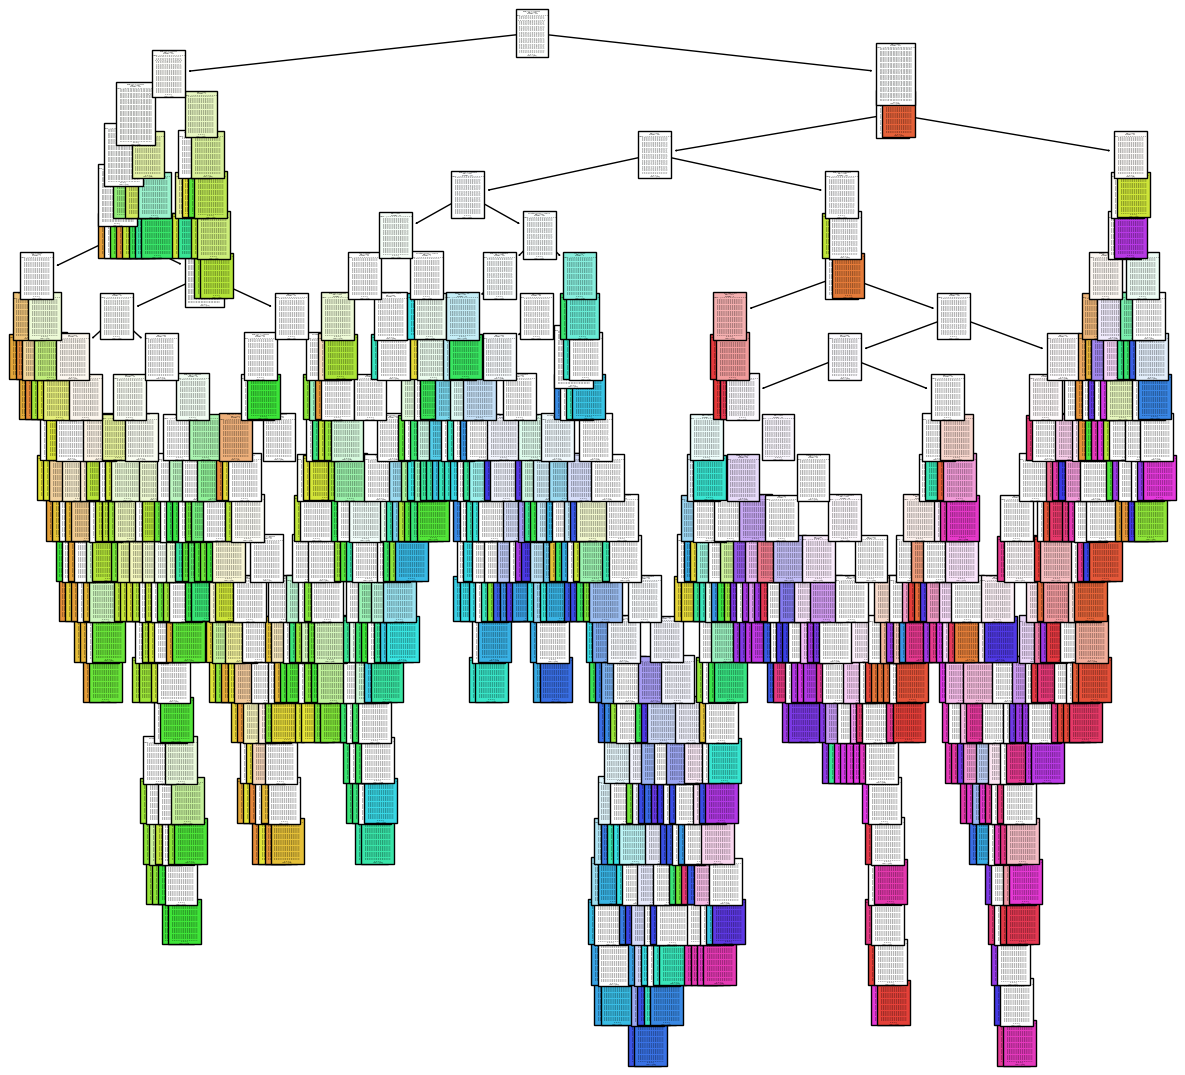

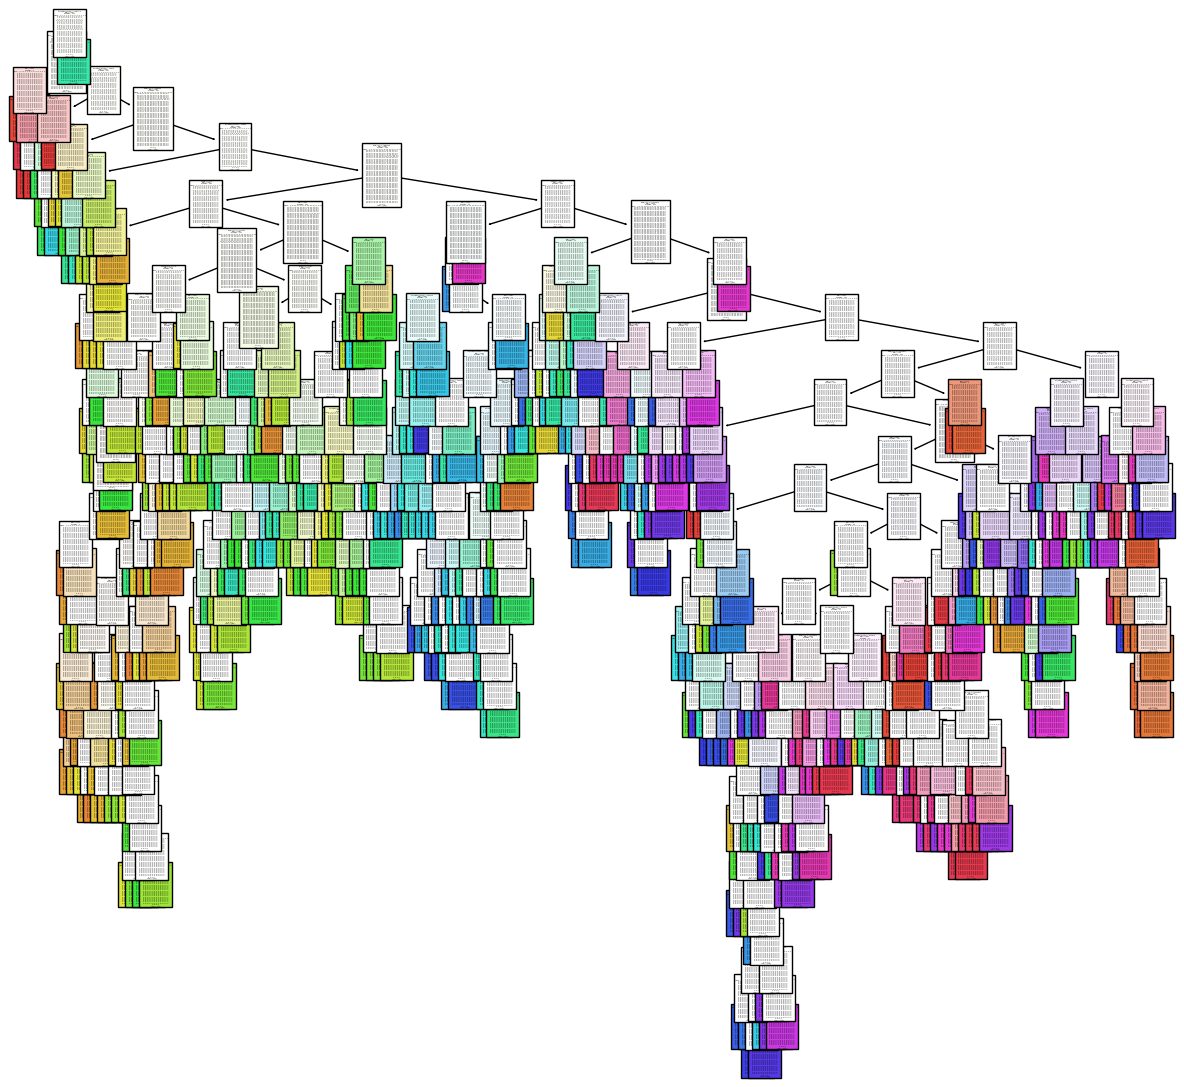

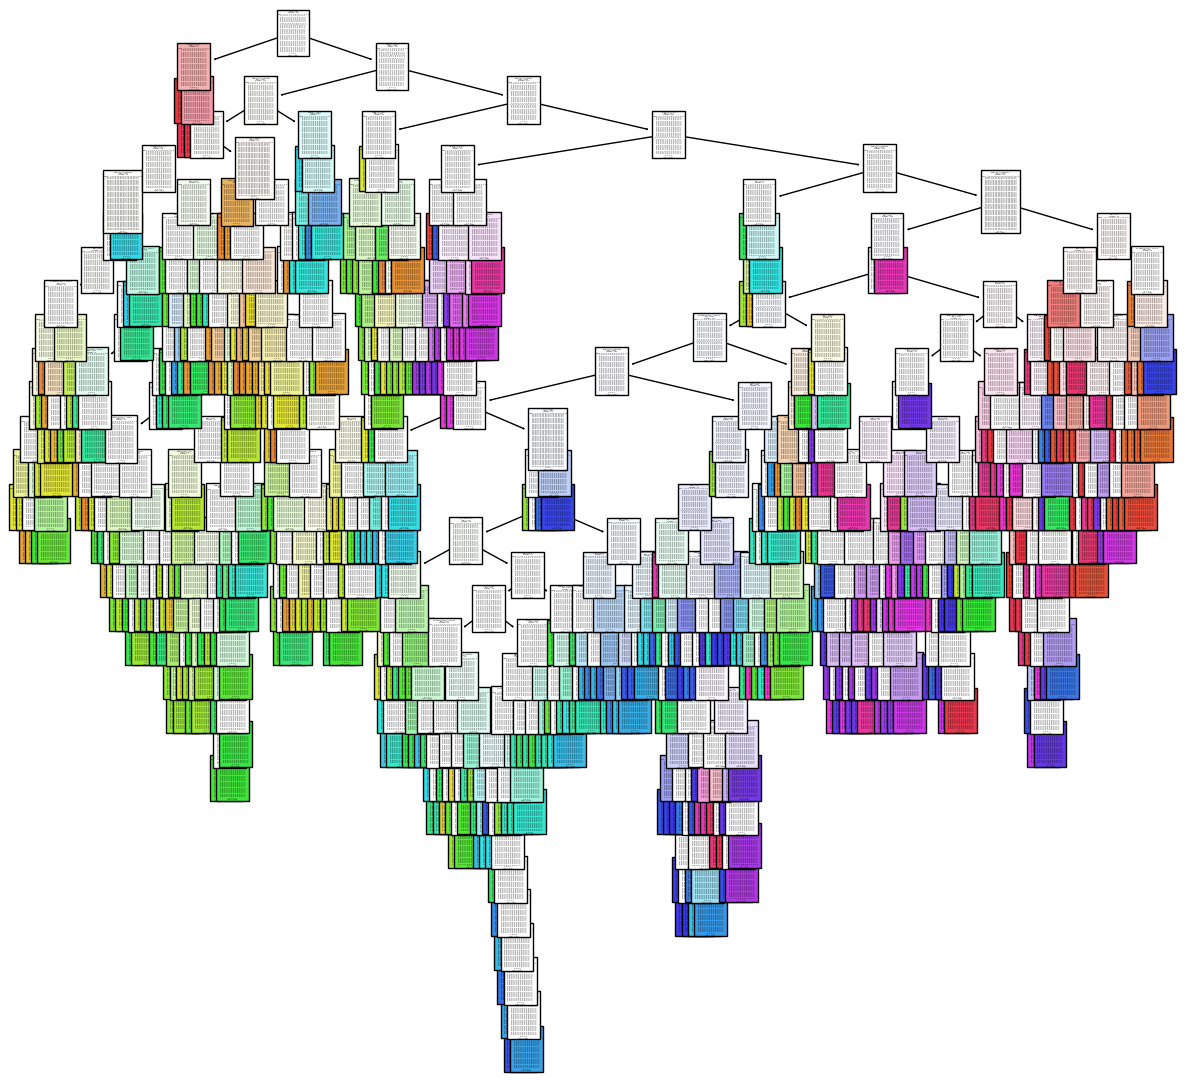

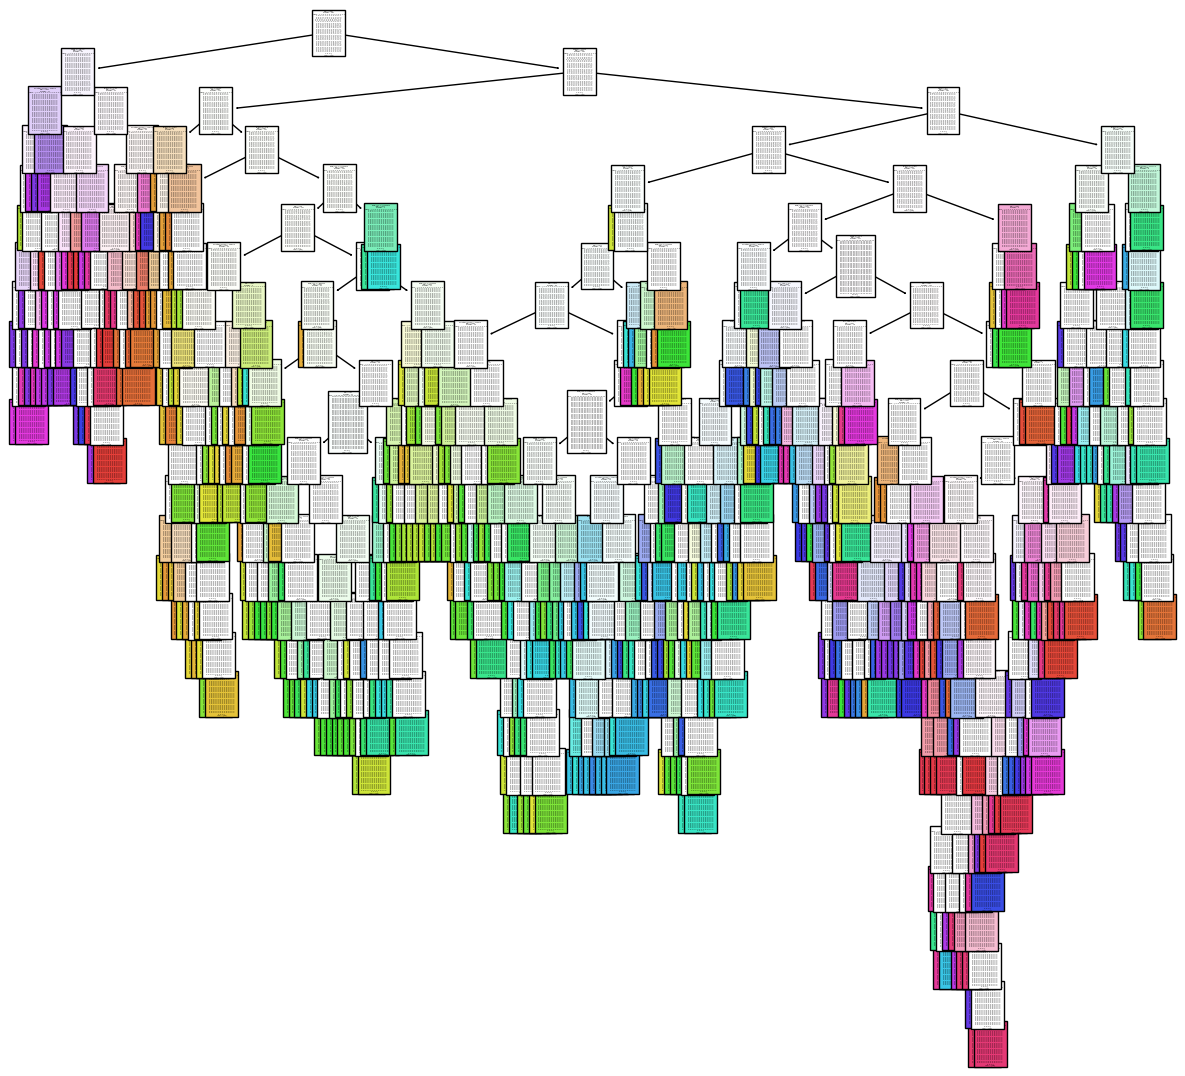

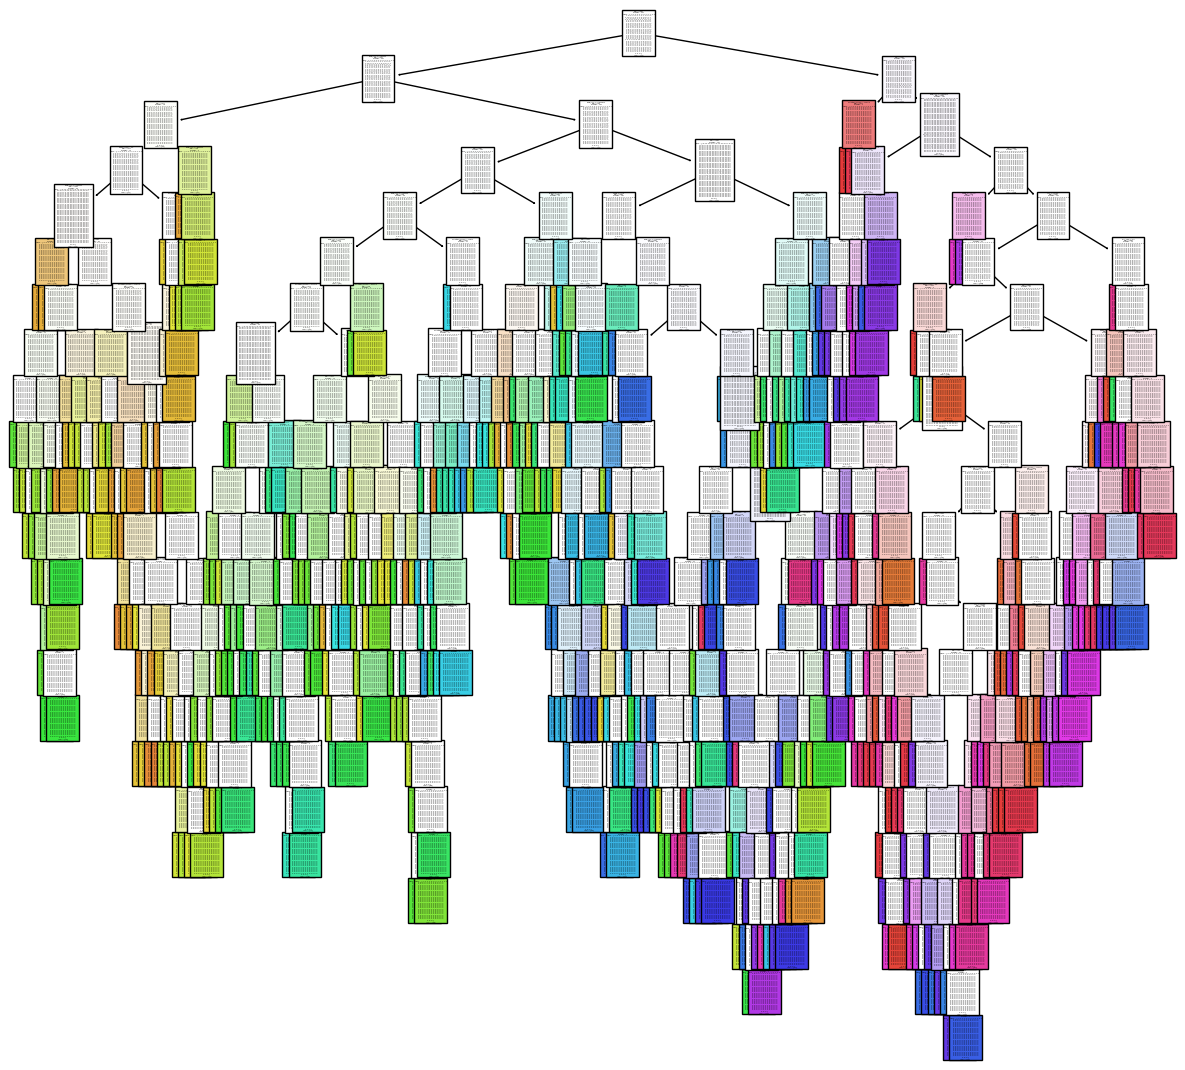

In [89]:
# Plot the decision trees of the Random Forest
plt.figure(figsize=(50, 30))
for i in range(5):  # Plotting first 5 trees
    plt.figure(figsize=(50, 30))
    plt.subplot(2, 3, i+1)
    plot_tree(rf_classifier.estimators_[i], filled=True, feature_names=X.columns, class_names=True)
    plt.show()
    print("\n\n")
